## Dollar Cost Averaging vs Lump-Sum
- In this Notebook, we can quantify the differences from DCA vs Lump Sum

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime as date

plt.style.use("fivethirtyeight")

In [5]:
# Step 1: Data Retrieval
start_date = "2012-08-01"
end_date = date.today()

# ^GSPC https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch
df_data = pd.DataFrame(
    yf.download("^GSPC", start=start_date, end=end_date, interval="1mo")
)
df_data = df_data.dropna()
# set date as index
# df_data = df_data.set_index(pd.DatetimeIndex(df_data['Date'].values))
df_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-08-01,1379.319946,1426.680054,1354.650024,1406.579956,1406.579956,70283810000
2012-09-01,1406.540039,1474.510010,1396.560059,1440.670044,1440.670044,69784280000
2012-10-01,1440.900024,1470.959961,1403.280029,1412.160034,1412.160034,71752320000
2012-11-01,1412.199951,1434.270020,1343.349976,1416.180054,1416.180054,71489310000
2012-12-01,1416.339966,1448.000000,1398.109985,1426.189941,1426.189941,66388180000
...,...,...,...,...,...,...
2023-09-01,4530.600098,4541.250000,4238.629883,4288.049805,4288.049805,73482980000
2023-10-01,4284.520020,4393.569824,4103.779785,4193.799805,4193.799805,83519460000
2023-11-01,4201.270020,4587.640137,4197.740234,4567.799805,4567.799805,80970570000


Text(0, 0.5, 'Adj. Close Price (USD)')

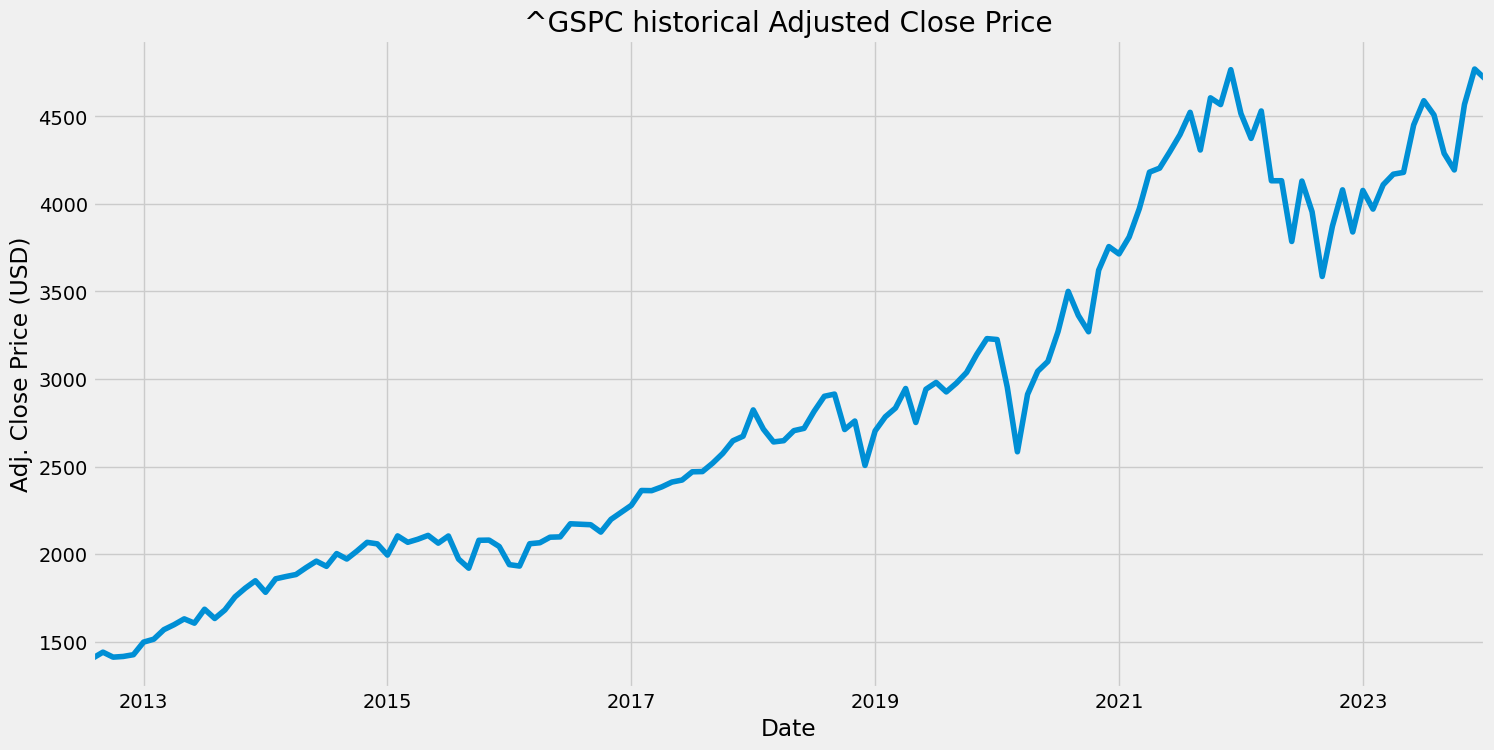

In [6]:
# Visualize the adjustment close price hsitorical data
df_data["Adj Close"].plot(figsize=(16, 8))
plt.title("^GSPC historical Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Adj. Close Price (USD)")

In [7]:
# Calculate and show the lump sum investment strategy
# Get the adjusted close prices from the data set
adj_close_prices = df_data["Adj Close"]

# Choose initial investment amount
initial_investment = 5_000

# Get the latest prices values of the Stock/ETF within this data set
asset_latest_value = adj_close_prices[-1]

# Get the number of shares bought on each date with the hypothetical investment amount (lump sum)
num_shares_bought = initial_investment / adj_close_prices

# Calculate how much money a person would have according to the last price of this data set for investing a lum sum on a given date in the past
lump_sum = asset_latest_value * num_shares_bought

lump_sum

Date
2012-08-01    16763.391367
2012-09-01    16366.724908
2012-10-01    16697.151684
2012-11-01    16649.754550
2012-12-01    16532.896221
                  ...     
2023-09-01     5498.781816
2023-10-01     5622.359529
2023-11-01     5162.014821
2023-12-01     4943.373224
2024-01-01     5000.000000
Name: Adj Close, Length: 138, dtype: float64

In [8]:
# Compute and show the best and worst day for a lump sum investment
print("Lump Sum Investments:")
print(
    f"Lump Sum day to invest an amount of {initial_investment} lump sum was on {lump_sum.idxmax().strftime('%b %d %Y')} and would be worth ${round(lump_sum.max(),2)}"
)
print(
    f"Lump Sum day to invest an amount of {initial_investment} lump sum was on {lump_sum.idxmin().strftime('%b %d %Y')} and would be worth ${round(lump_sum.min(),2)}"
)

Lump Sum Investments:
Lump Sum day to invest an amount of 5000 lump sum was on Aug 01 2012 and would be worth $16763.39
Lump Sum day to invest an amount of 5000 lump sum was on Dec 01 2023 and would be worth $4943.37


Text(0, 0.5, 'Investment value (USD)')

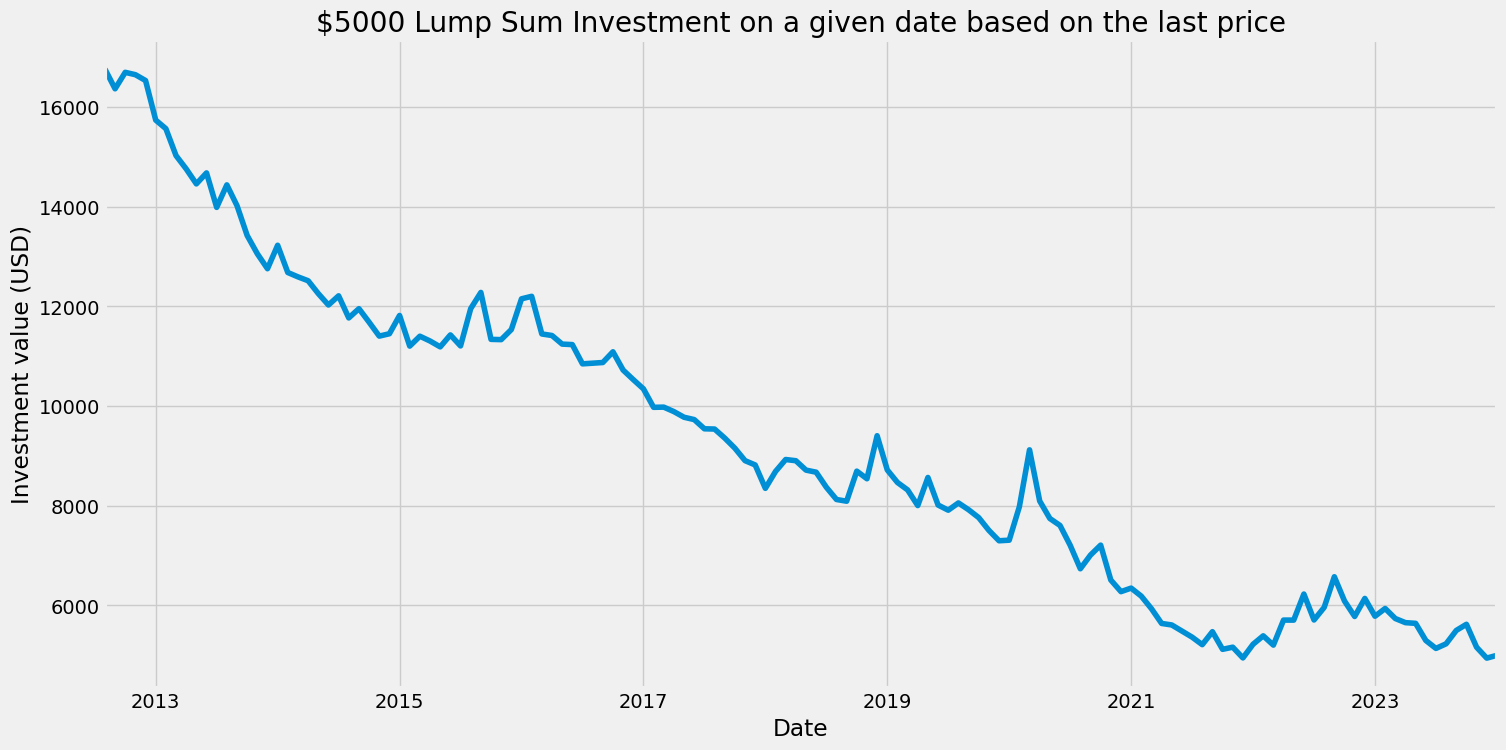

In [9]:
# Plot the lump sum data
lump_sum.plot(figsize=(16, 8))
plt.title(
    f"${initial_investment} Lump Sum Investment on a given date based on the last price"
)
plt.xlabel("Date")
plt.ylabel("Investment value (USD)")

In [10]:
# Create a function to calculate the Dollar Cost Averaging Strategy
def dca(start_date, initial_investment):
    # Get the investment periods which will be 12
    investment_date_periods = 12.0

    # Calculate the portion or amount that I plan to invest for each investment date period
    investment_portion = initial_investment / investment_date_periods

    # Get the dates of the investment periods
    all_investment_dates = pd.date_range(
        start_date, periods=investment_date_periods, freq="30D"
    )

    # Get the dates up to the last date in our data set
    investment_dates = all_investment_dates[all_investment_dates < df_data.index[-1]]

    # Get the indecies (and in turn the dates) within the data set that are the closest to the investment date
    closest_investment_date = df_data.index.searchsorted(investment_dates)

    # Get a list of stock prices at the closest investment date
    asset_prices = df_data["Adj Close"][closest_investment_date]

    # Get the total number of shares that I invested in by summing all of the shares purchased on each of the investment dates
    total_shares_invested = sum(investment_portion / asset_prices)

    # Get the cahs that was not invested from the initial investment amount
    uninvested_cash = investment_portion * sum(
        all_investment_dates >= df_data.index[-1]
    )

    # Calculate the total
    total = uninvested_cash + df_data["Adj Close"][-1] * total_shares_invested
    return total

In [11]:
# Execute DCA function
dca_list = []

for date in df_data.index:
    dca_list.append(dca(date, initial_investment))

In [12]:
# Convert the list to a series
df_dca = pd.DataFrame()
df_dca["DCA"] = dca_list
df_dca = df_dca.set_index(pd.DatetimeIndex(df_data.index))

# Convert DF to series
df_dca = df_dca.squeeze()

df_dca

Date
2012-08-01    15602.296333
2012-09-01    15408.627513
2012-10-01    15213.251389
2012-11-01    14940.453490
2012-12-01    14641.084429
                  ...     
2023-09-01     5102.210783
2023-10-01     5060.645631
2023-11-01     5008.782337
2023-12-01     4995.281102
2024-01-01     5000.000000
Name: DCA, Length: 138, dtype: float64

In [13]:
# Compute and show the best and worst day for a lump sum investment
print("DCA  Investments:")
print(
    f"dca day to invest an amount of ${initial_investment} dca was on {df_dca.idxmax().strftime('%b %d %Y')} and would be worth ${round(df_dca.max(),2)}"
)
print(
    f"dca day to invest an amount of ${initial_investment} dca was on {df_dca.idxmin().strftime('%b %d %Y')} and would be worth ${round(df_dca.min(),2)}"
)

DCA  Investments:
dca day to invest an amount of $5000 dca was on Aug 01 2012 and would be worth $15602.3
dca day to invest an amount of $5000 dca was on Dec 01 2023 and would be worth $4995.28


Text(0, 0.5, 'Investment value (USD)')

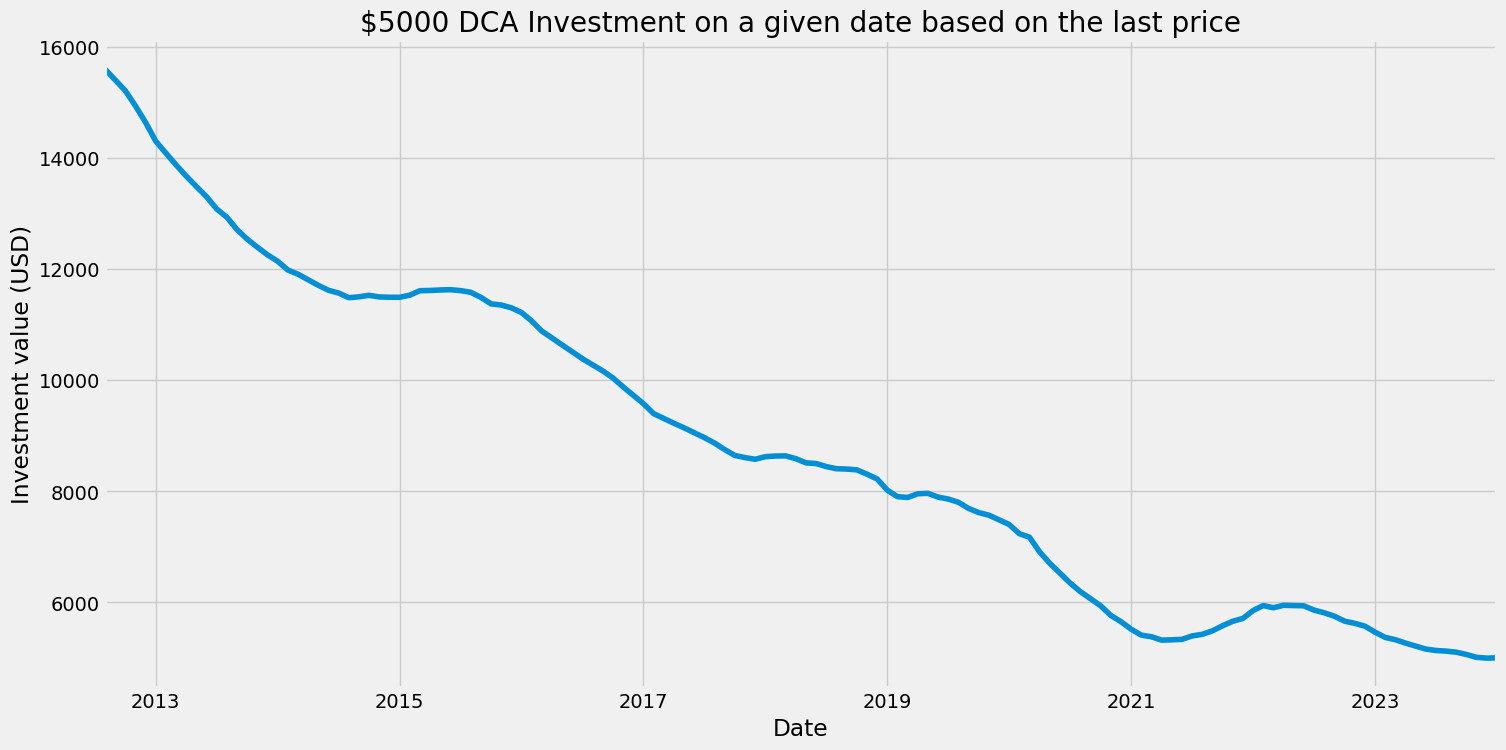

In [14]:
# Plot the lump sum data
df_dca.plot(figsize=(16, 8))
plt.title(
    f"${initial_investment} DCA Investment on a given date based on the last price"
)
plt.xlabel("Date")
plt.ylabel("Investment value (USD)")

In [15]:
# Get volatility

lump_sum_vol = lump_sum.pct_change().std()
dca_vol = df_dca.pct_change().std()

print(f"Lump Sum Volatility: {lump_sum_vol}")
print(f"DCA Volatility: {dca_vol}")

Lump Sum Volatility: 0.042106045781856345
DCA Volatility: 0.00965799649979923


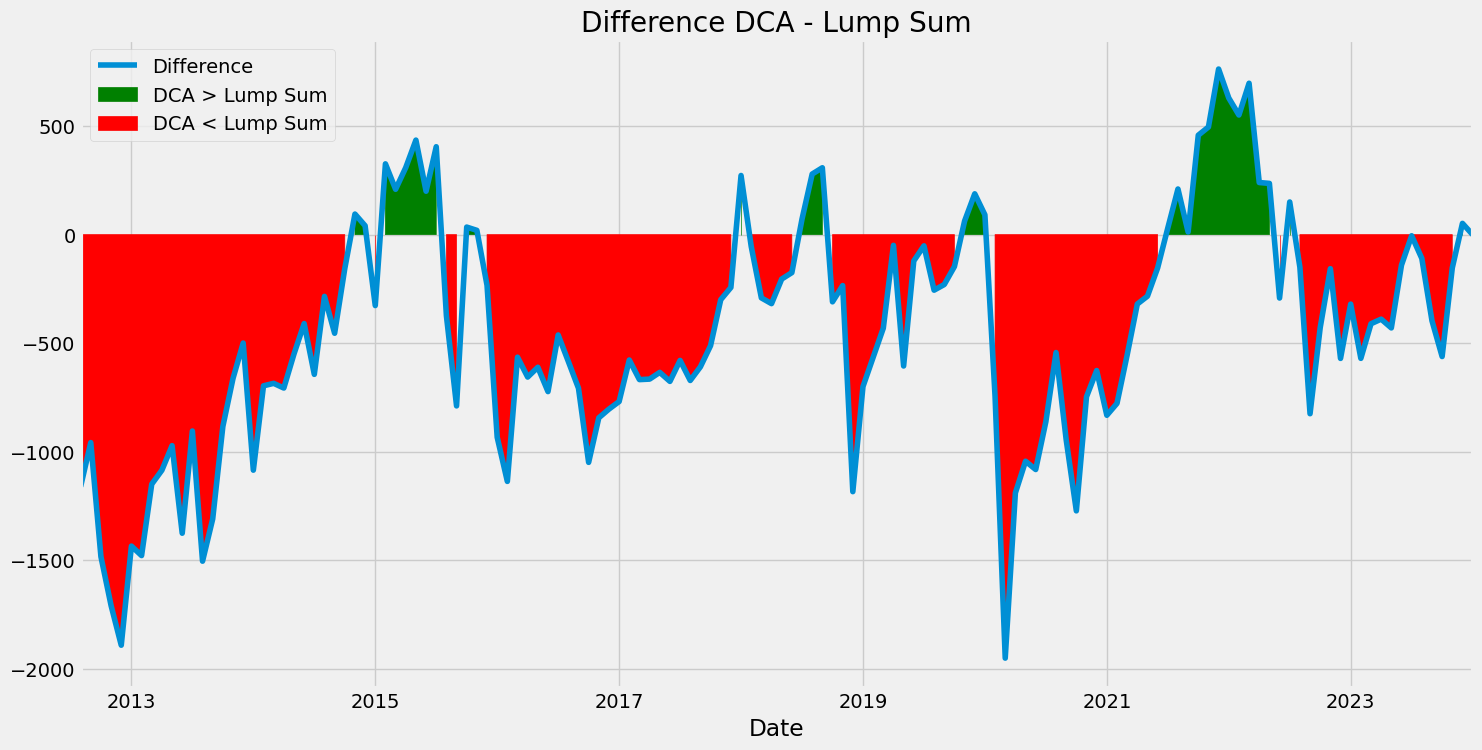

In [16]:
# Get the difference
diff = df_dca - lump_sum

# plot the diff
diff.plot(figsize=(16, 8), label="Difference")
plt.fill_between(
    diff.index, y1=diff, y2=0, color="green", where=diff > 0, label="DCA > Lump Sum"
)
plt.fill_between(
    diff.index, y1=diff, y2=0, color="red", where=diff < 0, label="DCA < Lump Sum"
)
plt.title("Difference DCA - Lump Sum")
plt.legend()

# Save the figure
plt.savefig('images/difference_plot.png', bbox_inches='tight')

In [17]:
# Calculate the win percentages
lump_sum_win_pct = round(sum(diff < 0) / len(diff) * 100, 1)
dca_win_pct = round(sum(diff > 0) / len(diff) * 100, 1)

print(f"Lump Sum returned more than DCA: {lump_sum_win_pct}%")
print(f"DCA returned more than lump sum: {dca_win_pct}%")

Lump Sum returned more than DCA: 77.5%
DCA returned more than lump sum: 21.7%
